In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import folium
import numpy as np
import matplotlib as mpl
from folium.plugins import MarkerCluster
import json
import fiona 

In [2]:
df=pd.read_csv('MORA_alerts.csv', encoding="ISO-8859-1")
df.head()

C:\Users\Meredith.Raymer\Anaconda3\envs\geo-env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,alert_char_crc,alert_uuid,uuid_version,current_flag,elt_run_id,total_occurences,alert_type,sub_type,street,...,report_description,location_lat,location_lon,jam_uuid,start_pub_millis,start_pub_utc_timestamp,pub_millis,pub_utc_timestamp,pub_utc_epoch_week,road_type
0,1,c962717c,aac6254f-54ed-34f6-8064-98b8ba3476ac,1,1,1533940866,7581,ROAD_CLOSED,ROAD_CLOSED_EVENT,SR-410,...,NaN,46.873797,-121.516243,NaN,1488718428799,2017-03-05 12:53:48,1488718428799,2017-03-05 12:53:48,9,NaN
1,2,e3a0ec27,6eb4e413-ff51-3604-8389-6e4c22685eed,1,1,1533940866,7581,ROAD_CLOSED,ROAD_CLOSED_EVENT,SR-410,...,NaN,46.869337,-121.520425,NaN,1488718428002,2017-03-05 12:53:48,1488718428002,2017-03-05 12:53:48,9,NaN
2,3,f17a86f0,9ec60704-e1ca-398f-a7d8-a103c4cceea5,1,1,1533940866,7581,ROAD_CLOSED,ROAD_CLOSED_EVENT,SR-410,...,NaN,46.910272,-121.413547,NaN,1488718436952,2017-03-05 12:53:56,1488718436952,2017-03-05 12:53:56,9,NaN
3,4,609758aa,7e7f46e2-1214-33ec-85ed-b9ab8e8ed6d2,1,1,1533940866,7581,ROAD_CLOSED,ROAD_CLOSED_EVENT,SR-410,...,NaN,46.876921,-121.516890,NaN,1488718442031,2017-03-05 12:54:02,1488718442031,2017-03-05 12:54:02,9,NaN
4,5,9926b639,087717b9-255e-3be3-aba9-75689a44dfa3,1,1,1533940866,7581,ROAD_CLOSED,ROAD_CLOSED_EVENT,SR-410,...,NaN,46.914910,-121.384891,NaN,1488718447905,2017-03-05 12:54:07,1488718447905,2017-03-05 12:54:07,9,NaN


In [41]:
list(df.columns.values)

['Unnamed: 0',
 'alert_char_crc',
 'alert_uuid',
 'uuid_version',
 'current_flag',
 'elt_run_id',
 'total_occurences',
 'alert_type',
 'sub_type',
 'street',
 'city',
 'state',
 'country',
 'num_thumbsup',
 'reliability',
 'confidence',
 'report_rating',
 'magvar',
 'report_description',
 'location_lat',
 'location_lon',
 'jam_uuid',
 'start_pub_millis',
 'start_pub_utc_timestamp',
 'pub_millis',
 'pub_utc_timestamp',
 'pub_utc_epoch_week',
 'road_type',
 'pub_utc_timestamp_date',
 'date',
 'month_year',
 'year',
 'month',
 'hour',
 'ones']

In [42]:
df.street.value_counts()

I-82 W           139085
I-82 E           125013
SR-410            70519
I-90 W            63013
I-90 E            50356
                  ...  
N Charles St          1
S Chestnut St         1
Prestwick Dr          1
Jefferson Dr          1
Snipes Rd             1
Name: street, Length: 1704, dtype: int64

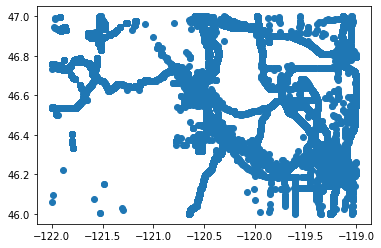

In [8]:
plt.scatter(df['location_lon'], df['location_lat'])
plt.show()

In [10]:
df['pub_utc_timestamp_date']=pd.to_datetime(df['pub_utc_timestamp'])

In [12]:
df['date']=df["pub_utc_timestamp_date"].dt.strftime('%m/%d/%y')
df['month_year']=df["pub_utc_timestamp_date"].dt.strftime('%Y-%m')
df['year']=df["pub_utc_timestamp_date"].dt.strftime('%Y')
df['month']=df["pub_utc_timestamp_date"].dt.strftime('%B')
df['hour']=df["pub_utc_timestamp_date"].dt.strftime('%I%p')

In [13]:
df.hour.value_counts()

11PM    59757
10PM    57129
09PM    55794
12AM    55391
08PM    53826
07PM    49875
06PM    44561
01AM    40025
05PM    38677
04PM    30897
02AM    27100
03PM    26539
02PM    20436
03AM    18393
01PM    15031
04AM    12256
06AM    10306
12PM     9187
05AM     8713
07AM     5433
11AM     5060
08AM     4717
10AM     4294
09AM     3998
Name: hour, dtype: int64

In [15]:
df_month_grouped=df.groupby(['month_year']).count()
df_month_grouped=df_month_grouped.reset_index()
df_month_grouped=df_month_grouped[['month_year','alert_char_crc']].sort_values(by='month_year')
df_month_grouped

,month_year,alert_char_crc
0,2017-03,5010
1,2017-04,8200
2,2017-05,10998
3,2017-06,13996
4,2017-07,15611
5,2017-08,16402
6,2017-09,11720
7,2017-10,9139
8,2017-11,7811
9,2017-12,7272


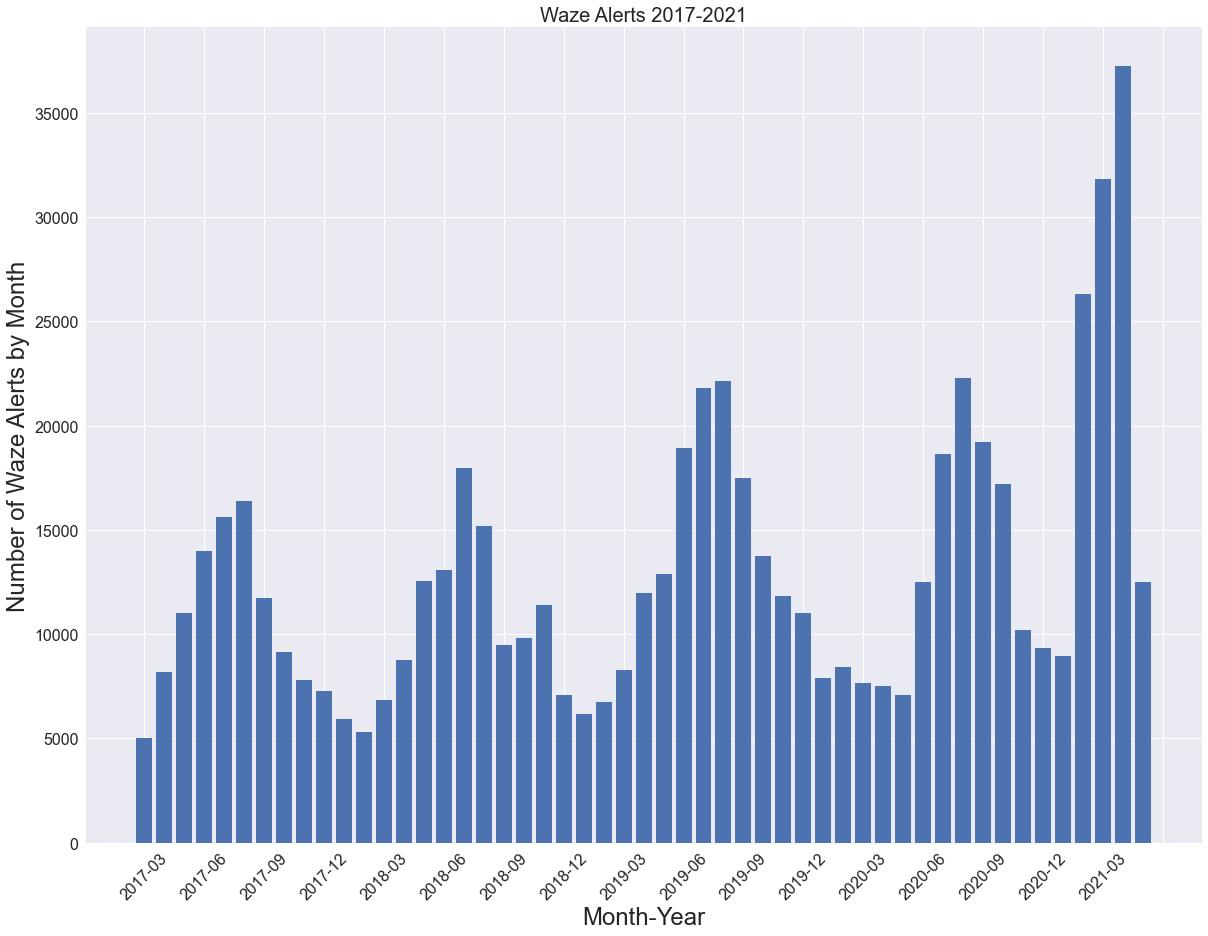

In [19]:
import matplotlib.ticker as ticker
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1,figsize=(20,15))
ax.bar(df_month_grouped.month_year, df_month_grouped.alert_char_crc, linewidth=4)
ax.set_title('Waze Alerts 2017-2021', fontsize=20)

ax.set_xlabel('Month-Year', fontsize=24)
ax.set_ylabel('Number of Waze Alerts by Month', fontsize=24)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which ='major', labelsize=16, rotation=45)
ax.tick_params(axis='y', which ='major', labelsize=16)
ax.tick_params(axis='both', which ='minor', labelsize=16)
ax.grid('off')

plt.show()

In [24]:
df_year_grouped=df.groupby(['year']).count()
df_year_grouped = df_year_grouped.reset_index()
df_year_grouped=df_year_grouped[['year','alert_char_crc']].sort_values(by='year')
df_year_grouped


,year,alert_char_crc
0,2017,106159
1,2018,123343
2,2019,163098
3,2020,147973
4,2021,116822


In [25]:
sorter = ['January', 'February', 'March', 'April', 'May','June','July','August','September',
         'October','November','December']

df_months = df.groupby(['month']).count()
df_months= df_months.reset_index()
df_months = df_months[['month','alert_char_crc']]

df_months.month = df_months.month.astype("category")
df_months.month.cat.set_categories(sorter, inplace=True)
df_months = df_months.sort_values('month')
df_months = df_months.reset_index()
df_months = df_months[['month','alert_char_crc']]
df_months

,month,alert_char_crc
0,January,28958
1,February,46785
2,March,59638
3,April,73706
4,May,56018
5,June,58486
6,July,73989
7,August,76059
8,September,57883
9,October,49949


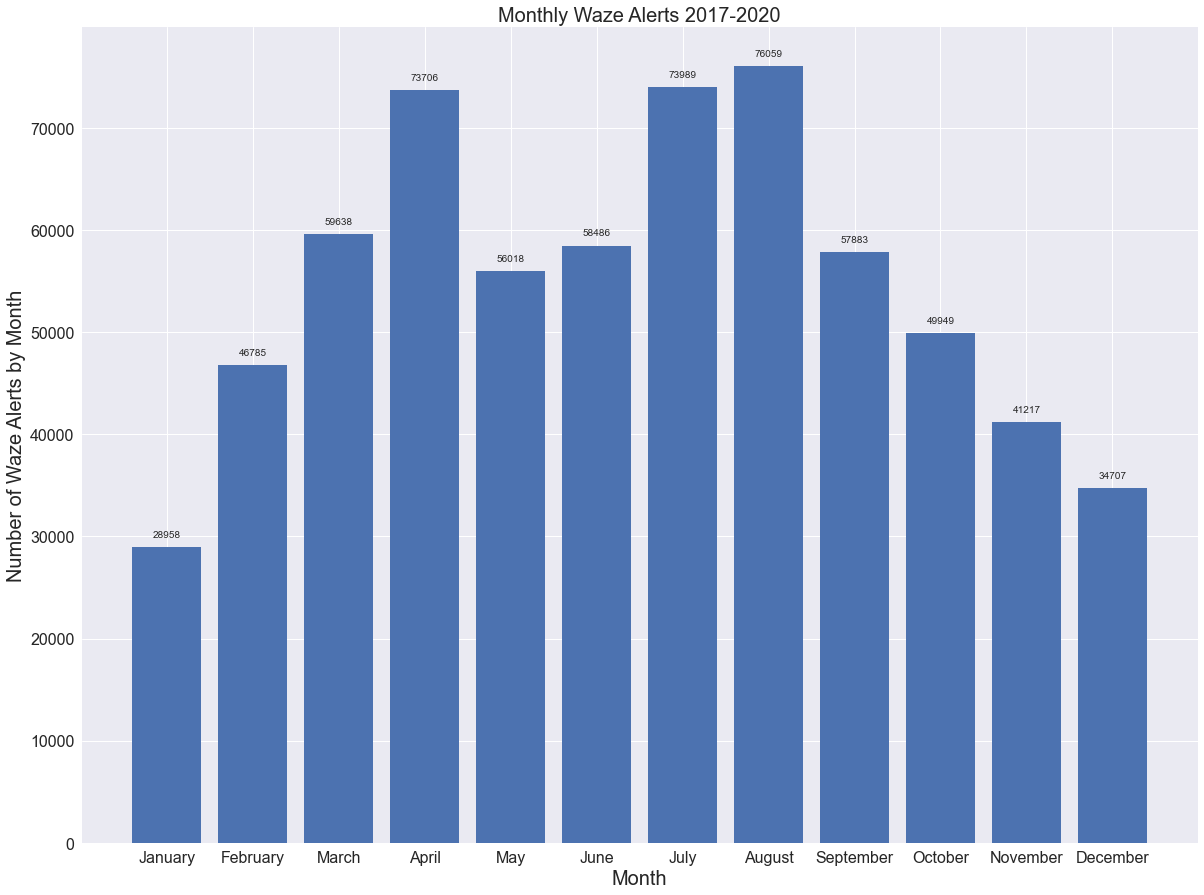

In [26]:
import matplotlib.ticker as ticker

tick_spacing = 1
fig, ax = plt.subplots(1,1,figsize=(20,15))
ax.bar(df_months.month, df_months.alert_char_crc, linewidth=4)
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26)
ax.set_title('Monthly Waze Alerts 2017-2020',fontsize= 20) # title of plot

ax.set_xlabel('Month',fontsize = 20) #xlabel
ax.set_ylabel('Number of Waze Alerts by Month', fontsize = 20)#ylabel
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=8)

for x,y in zip(df_months.month, df_months.alert_char_crc):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

In [27]:
df.alert_type.value_counts()

WEATHERHAZARD    520247
ROAD_CLOSED       83210
JAM               42448
ACCIDENT          11490
Name: alert_type, dtype: int64

In [28]:
df.sub_type.value_counts()

HAZARD_ON_SHOULDER_CAR_STOPPED        412580
ROAD_CLOSED_EVENT                      83174
HAZARD_ON_ROAD_CONSTRUCTION            28431
HAZARD_ON_ROAD_OBJECT                  20494
JAM_MODERATE_TRAFFIC                   15963
HAZARD_ON_ROAD_CAR_STOPPED             15164
HAZARD_WEATHER_FOG                     13158
JAM_HEAVY_TRAFFIC                      12783
JAM_STAND_STILL_TRAFFIC                 9934
HAZARD_ON_ROAD_POT_HOLE                 5550
HAZARD_ON_ROAD_ROAD_KILL                4344
ACCIDENT_MAJOR                          3634
ACCIDENT_MINOR                          3067
HAZARD_ON_SHOULDER_ANIMALS              2902
HAZARD_ON_SHOULDER                      1945
HAZARD_ON_SHOULDER_MISSING_SIGN         1436
HAZARD_ON_ROAD_ICE                      1415
HAZARD_ON_ROAD                           559
HAZARD_WEATHER                           273
HAZARD_ON_ROAD_TRAFFIC_LIGHT_FAULT       152
HAZARD_WEATHER_FLOOD                     128
HAZARD_WEATHER_HEAVY_SNOW                 95
HAZARD_WEA

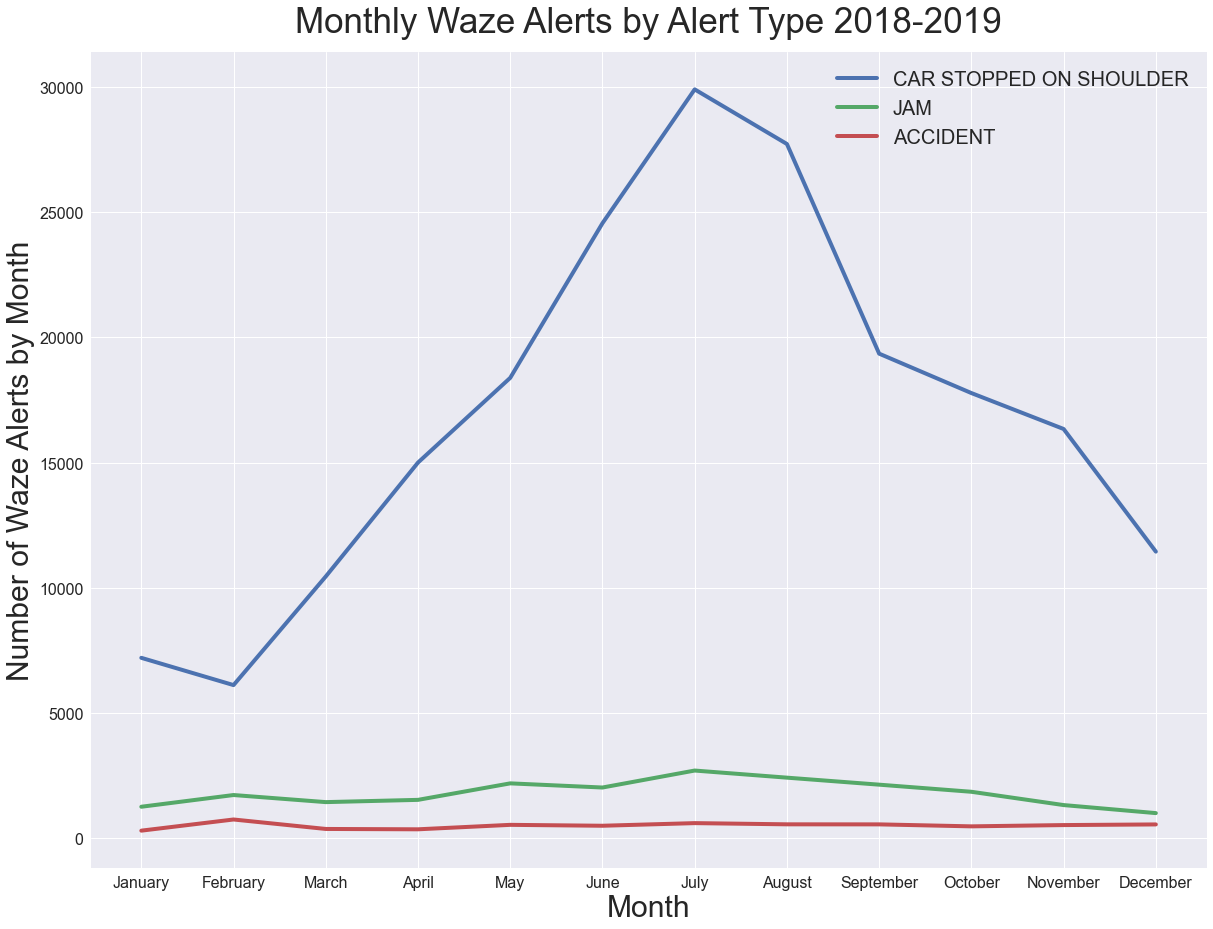

In [29]:
plt.style.use('seaborn')

months = ['January', 'February', 'March', 'April', 'May','June','July','August','September',
     'October','November','December']

month_df_alerts = pd.DataFrame({'months':months})
fig, ax = plt.subplots(1,1,figsize=(20,15))

for x in df.alert_type.unique():
    if  x =='ROAD_CLOSED':
        continue
    temp_df = df.loc[df['alert_type']==x]
    temp_df = temp_df.loc[temp_df['year'].isin(['2018','2019'])]
    if x =='WEATHERHAZARD':
        temp_df = temp_df.loc[temp_df['sub_type']=='HAZARD_ON_SHOULDER_CAR_STOPPED']
        x = "CAR STOPPED ON SHOULDER"
    temp_df_months = temp_df.groupby(['month']).count()
    temp_df_months= temp_df_months.reset_index()
    temp_df_months = temp_df_months[['month','alert_char_crc']]

    temp_df_months.month = temp_df_months.month.astype("category")
    temp_df_months.month.cat.set_categories(months, inplace=True)
    temp_df_months = temp_df_months.sort_values('month')
    temp_df_months= temp_df_months.reset_index()
    month_df_alerts[x] =temp_df_months[['alert_char_crc']] 
    ax.plot(months,month_df_alerts[x], label = x, linewidth=4)

ax.set_title('Monthly Waze Alerts by Alert Type 2018-2019',fontsize= 35, pad = 20) # title of plot

ax.set_xlabel('Month',fontsize = 30) #xlabel
ax.set_ylabel('Number of Waze Alerts by Month', fontsize = 30)#ylabel
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.grid('on')
plt.legend(fontsize = 20)
plt.show()

In [8]:
df_accidents = df.loc[df['alert_type']=='ACCIDENT']
df_accidents = df_accidents.reset_index()
df_jams = df.loc[df['alert_type']=='JAM']
df_jams = df_jams.reset_index()
df_shoulder = df.loc[df['sub_type']=='HAZARD_ON_SHOULDER_CAR_STOPPED']
df_shoulder = df_shoulder.reset_index()


df_accidents.shape, df_jams.shape, df_shoulder.shape

((11490, 29), (42448, 29), (412580, 29))

In [31]:
months = ['January', 'February', 'March', 'April', 'May','June','July','August','September',
     'October','November','December']

month_df_alerts = pd.DataFrame({'months':months})
#fig, ax = plt.subplots(1,1,figsize=(20,15))

for x in df_accidents.sub_type.unique():
    temp_df = df_accidents.loc[df_accidents['sub_type']==x]
    temp_df = temp_df.loc[temp_df['month_year'].isin(['2021-04','2021-05'])==False]
    if str(x) =='nan':
        x="No Details Captured"
        temp_df = df_accidents.loc[df_accidents['sub_type'].isin(['ACCIDENT_MAJOR','ACCIDENT_MINOR'])==False]
        

    print(x, ": ", len(temp_df))
    
    temp_df_months = temp_df.groupby(['month']).count()
    temp_df_months= temp_df_months.reset_index()
    if x =='ACCIDENT_MAJOR':
        new_row = {'index':1000, 'month':'April', 'alert_char_crc':0}
        #append row to the dataframe
        temp_df_months = temp_df_months.append(new_row, ignore_index=True)
        new_row = {'index':1001, 'month':'July', 'alert_char_crc':0}
        #append row to the dataframe
        temp_df_months = temp_df_months.append(new_row, ignore_index=True)

    if x =="No Details Captured":
        new_row = {'index':1000, 'month':'May', 'alert_char_crc':0}
        #append row to the dataframe
        temp_df_months = temp_df_months.append(new_row, ignore_index=True)
        new_row = {'index':1001, 'month':'June', 'alert_char_crc':0}
        #append row to the dataframe
        temp_df_months = temp_df_months.append(new_row, ignore_index=True)
    
    temp_df_months = temp_df_months[['month','alert_char_crc']]
    
    temp_df_months['alert_char_crc']=temp_df_months['alert_char_crc']/3
    temp_df_months.month = temp_df_months.month.astype("category")
    temp_df_months.month.cat.set_categories(months, inplace=True)
    temp_df_months = temp_df_months.sort_values('month')
    temp_df_months= temp_df_months.reset_index()
    month_df_alerts[x] =temp_df_months[['alert_char_crc']] 
    #ax.plot(months,month_df_alerts[x], label = x, linewidth=4)

month_df_alerts

No Details Captured :  4789
ACCIDENT_MINOR :  3009
ACCIDENT_MAJOR :  3524


,months,No Details Captured,ACCIDENT_MINOR,ACCIDENT_MAJOR
0,January,113.333333,59.000000,75.333333
1,February,189.000000,145.000000,107.333333
2,March,116.333333,68.666667,76.000000
3,April,112.000000,53.000000,63.666667
4,May,122.666667,67.666667,0.000000
5,June,0.000000,82.333333,99.333333
6,July,124.000000,92.666667,85.666667
7,August,0.000000,90.333333,125.000000
8,September,137.000000,82.000000,0.000000
9,October,135.333333,81.666667,123.000000


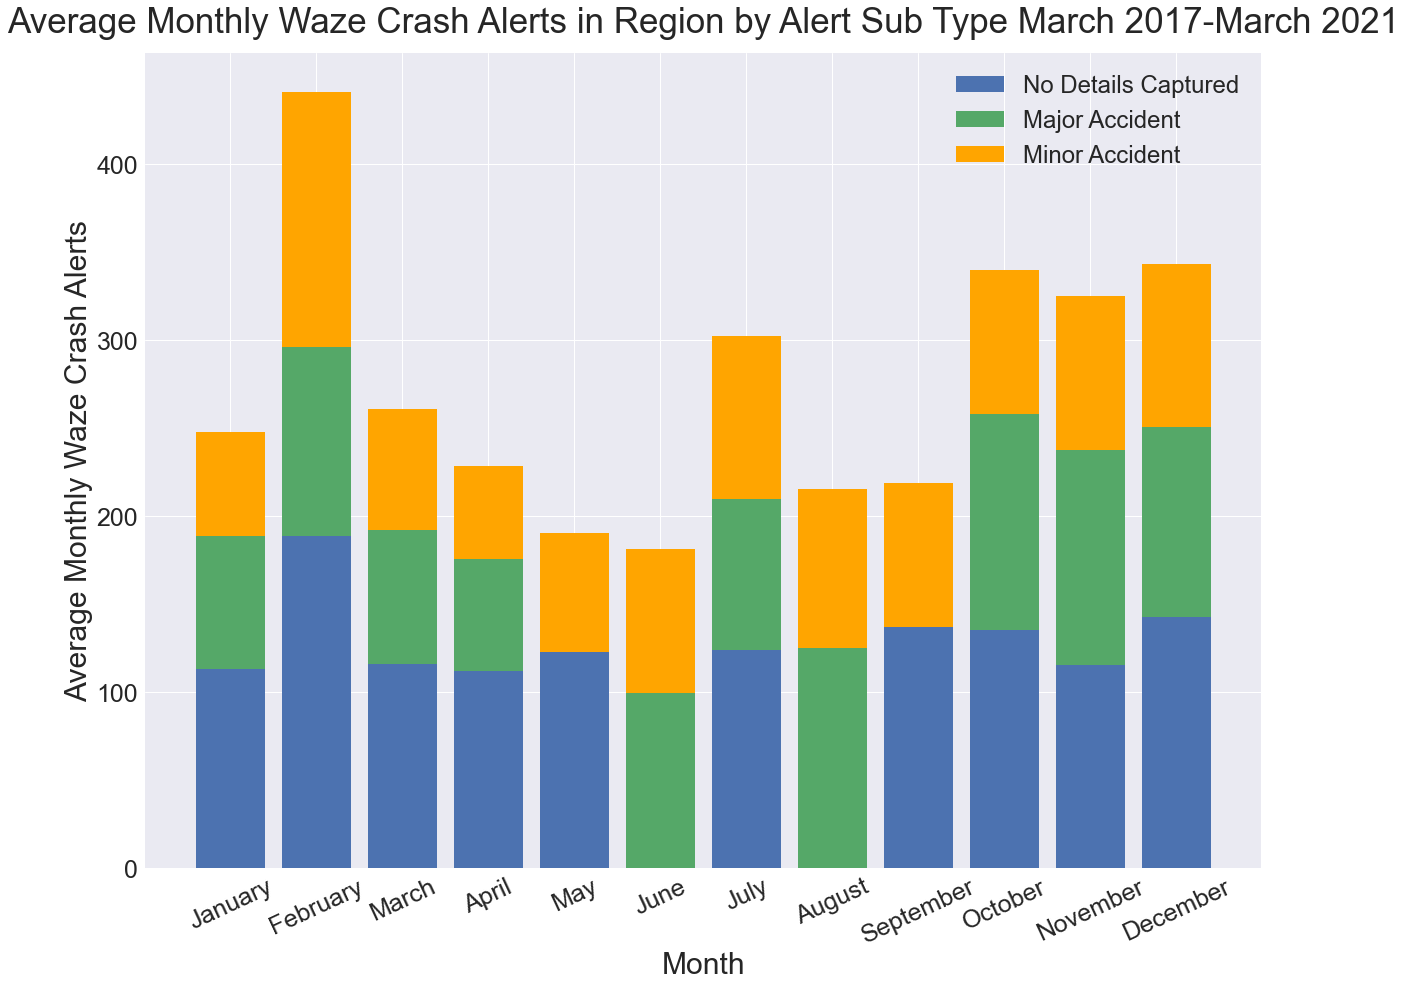

In [32]:
plt.style.use('seaborn')
tick_spacing = 1

months = ['January', 'February', 'March', 'April', 'May','June','July','August','September',
     'October','November','December']

fig, ax = plt.subplots(1,1,figsize=(20,15))
ax.bar(months,month_df_alerts['No Details Captured'], label = 'No Details Captured', linewidth=4)
ax.bar(months,month_df_alerts['ACCIDENT_MAJOR'], label = 'Major Accident', linewidth=4,
      bottom = month_df_alerts['No Details Captured'] )
ax.bar(months,month_df_alerts['ACCIDENT_MINOR'], label = 'Minor Accident', 
       bottom = month_df_alerts['ACCIDENT_MAJOR']+month_df_alerts['No Details Captured'] , linewidth=4, color = 'orange')

ax.set_title('Average Monthly Waze Crash Alerts in Region by Alert Sub Type March 2017-March 2021',fontsize= 35, pad = 20) # title of plot

ax.set_xlabel('Month',fontsize = 30) #xlabel
ax.set_ylabel('Average Monthly Waze Crash Alerts', fontsize = 30)#ylabel
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=25,rotation = 25)
ax.tick_params(axis='y', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.grid('on')
plt.legend(fontsize = 24)
plt.show()

In [7]:
months = ['January', 'February', 'March', 'April', 'May','June','July','August','September',
     'October','November','December']

month_df_jams = pd.DataFrame({'months':months})
#fig, ax = plt.subplots(1,1,figsize=(20,15))

for x in df_jams.sub_type.unique():
    temp_df = df_jams.loc[df_jams['sub_type']==x]
    temp_df = temp_df.loc[temp_df['month_year'].isin(['2021-04','2021-05'])==False]
    if str(x) =='nan':
        x="No Details Captured"
        temp_df = df_accidents.loc[df_jams['sub_type'].isin(['JAM_MODERATE_TRAFFIC','JAM_HEAVY_TRAFFIC', 'JAM_STAND_STILL_TRAFFIC'])==False]
        

    print(x, ": ", len(temp_df))
    
    temp_df_months = temp_df.groupby(['month']).count()
    temp_df_months= temp_df_months.reset_index()
    if x =='JAM_MODERATE_TRAFFIC':
        new_row = {'index':1000, 'month':'April', 'alert_char_crc':0}
        #append row to the dataframe
        temp_df_months = temp_df_months.append(new_row, ignore_index=True)
        new_row = {'index':1001, 'month':'July', 'alert_char_crc':0}
        #append row to the dataframe
        temp_df_months = temp_df_months.append(new_row, ignore_index=True)

    if x =="No Details Captured":
        new_row = {'index':1000, 'month':'May', 'alert_char_crc':0}
        #append row to the dataframe
        temp_df_months = temp_df_months.append(new_row, ignore_index=True)
        new_row = {'index':1001, 'month':'June', 'alert_char_crc':0}
        #append row to the dataframe
        temp_df_months = temp_df_months.append(new_row, ignore_index=True)


    temp_df_months = temp_df_months[['month','alert_char_crc']]
    
    temp_df_months['alert_char_crc']=temp_df_months['alert_char_crc']/3
    temp_df_months.month = temp_df_months.month.astype("category")
    temp_df_months.month.cat.set_categories(months, inplace=True)
    temp_df_months = temp_df_months.sort_values('month')
    temp_df_months= temp_df_months.reset_index()
    month_df_jams[x] =temp_df_months[['alert_char_crc']] 
    #ax.plot(months,month_df_alerts[x], label = x, linewidth=4)

month_df_jams

NameError: name 'df_jams' is not defined

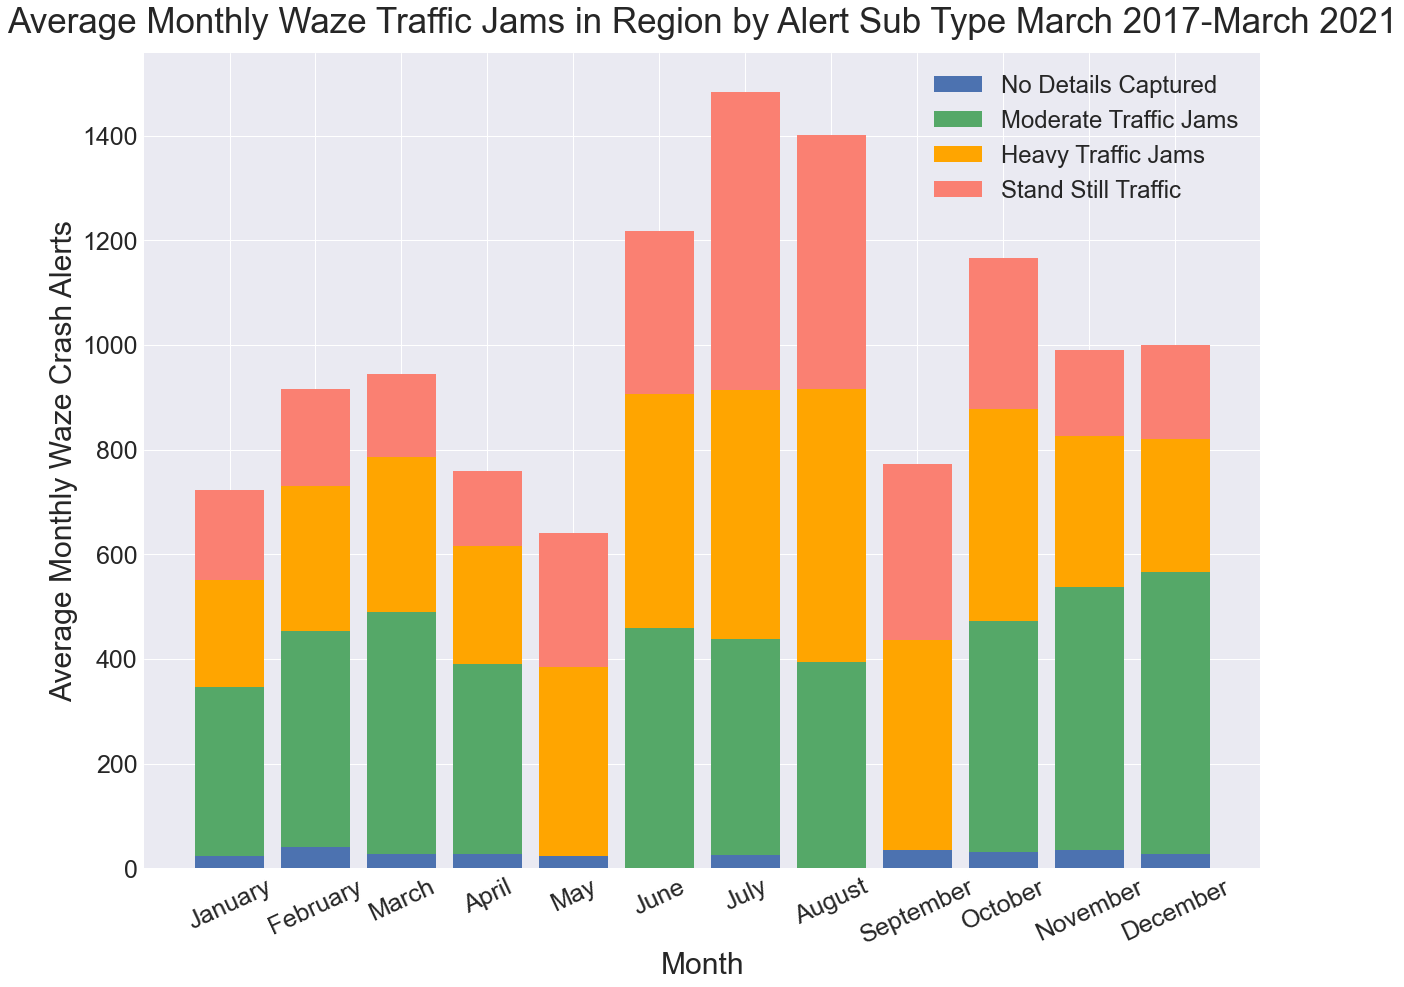

In [34]:
plt.style.use('seaborn')
tick_spacing = 1

months = ['January', 'February', 'March', 'April', 'May','June','July','August','September',
     'October','November','December']

fig, ax = plt.subplots(1,1,figsize=(20,15))
ax.bar(months,month_df_jams['No Details Captured'], label = 'No Details Captured', linewidth=4)
ax.bar(months,month_df_jams['JAM_MODERATE_TRAFFIC'], label = 'Moderate Traffic Jams', linewidth=4,
      bottom = month_df_jams['No Details Captured'] )
ax.bar(months,month_df_jams['JAM_HEAVY_TRAFFIC'], label = 'Heavy Traffic Jams', 
       bottom = month_df_jams['JAM_MODERATE_TRAFFIC']+month_df_jams['No Details Captured'] , linewidth=4, color = 'orange')
ax.bar(months,month_df_jams['JAM_STAND_STILL_TRAFFIC'], label = 'Stand Still Traffic', 
       bottom = month_df_jams['JAM_HEAVY_TRAFFIC']+month_df_jams['JAM_MODERATE_TRAFFIC']+month_df_jams['No Details Captured'] , linewidth=4, color = 'salmon')

ax.set_title('Average Monthly Waze Traffic Jams in Region by Alert Sub Type March 2017-March 2021',fontsize= 35, pad = 20) # title of plot

ax.set_xlabel('Month',fontsize = 30) #xlabel
ax.set_ylabel('Average Monthly Waze Crash Alerts', fontsize = 30)#ylabel
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=25,rotation = 25)
ax.tick_params(axis='y', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.grid('on')
plt.legend(fontsize = 24)
plt.show()

In [6]:
df_jams["ones"]=1

NameError: name 'df_jams' is not defined

In [5]:
df_jams_heavy = df_jams.loc[df_jams['sub_type'].isin(['JAM_HEAVY_TRAFFIC', 'JAM_STAND_STILL_TRAFFIC'])]

NameError: name 'df_jams' is not defined

In [9]:
#referenced blog: http://qingkaikong.blogspot.com/2016/06/using-folium-3-heatmap.html
from folium import plugins

m = folium.Map(zoom_start = 10, location=[46.2, -119.75],
                     tiles = 'openstreetmap')

gradient = {.3: 'blue', .4: 'lime', 1: 'red'}

# I am using the magnitude as the weight for the heatmap
m.add_children(plugins.HeatMap(zip(df_jams_heavy.location_lat, df_jams_heavy.location_lon, 
                                   df_jams_heavy.ones), radius = 10,
                              gradient=gradient))
m.save("waze_heavy_jams_heatmap.html")


NameError: name 'df_jams_heavy' is not defined

In [38]:
df['ones']=1

In [3]:
#referenced blog: http://qingkaikong.blogspot.com/2016/06/using-folium-3-heatmap.html
from folium import plugins

m = folium.Map(zoom_start = 10, location=[46.2, -119.75],
                     tiles = 'openstreetmap')

gradient = {.3: 'blue', .4: 'lime', 1: 'red'}

# I am using the magnitude as the weight for the heatmap
m.add_children(plugins.HeatMap(zip(df.location_lat, df.location_lon, 
                                   df.ones), radius = 10,
                              gradient=gradient))
m.save("waze_alerts_heatmap.html")

AttributeError: 'DataFrame' object has no attribute 'ones'